# Analysis of cropped images
After the images were cropped (either the bulb of the light, or the whole light), it is needed to ensure that the data contains significant information for the trainer to get most of the relevant characteristics. In this notebook, an analysis approach is given.

In [1]:
# Jupyter related code
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Number of Samples by Class
Let us consider the analysis of the number of images in the dataset broken by class i.e. how much data do the dataset provides. Then, this should help in creating the dataset that will aid to train the CNN.

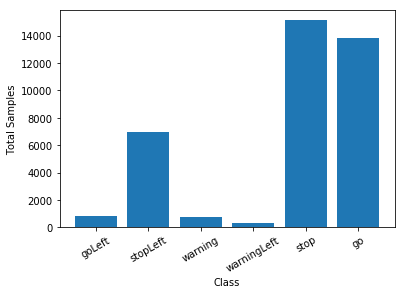

In [13]:
# Importing libraries
from fastai.vision import *
from PIL import Image
from matplotlib import colors

# Adjust these variables as required
path_to_analyze = Path('../data/cropped-dataset/')

# Getting classes from cropped dataset
class_path = path_to_analyze.ls()

# Obtaining information to create bar chart based on class labels and
# count of files for each
class_labels = []
class_samples = []
sample_size_width = []
sample_size_height = []

i = 0
while i < len(class_path):
    class_labels.append(class_path[i].stem)
    class_samples.append(len(class_path[i].ls()))
    
    for file in class_path[i].ls():
        im = Image.open(file)
        width, height = im.size
        sample_size_width.append(width)
        sample_size_height.append(height)
    
    i = i + 1

def plot_class_bar(class_labels, class_samples):
    index = np.arange(len(class_labels))
    plt.bar(index, class_samples)
    plt.xlabel('Class')
    plt.ylabel('Total Samples')
    plt.xticks(index, class_labels, rotation = 30)
    plt.show()

plot_class_bar(class_labels, class_samples)

## Image Size Histogram
Now, let us consider the image size and create an histogram from the data.

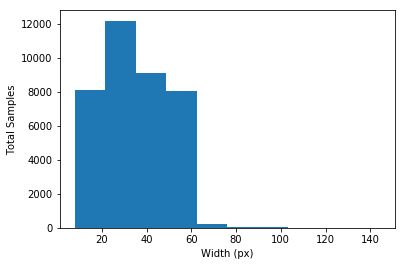

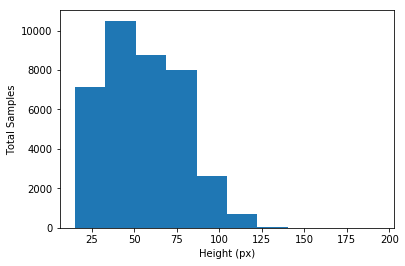

In [72]:
def plot_histogram(x_label, data):
    plt.hist(data, bins = 10)
    plt.xlabel(x_label)
    plt.ylabel('Total Samples')
    plt.show()

plot_histogram('Width (px)', sample_size_width)
plot_histogram('Height (px)', sample_size_height)

Both histograms show that most of the data is concentrated in images with Width between 20 px and 60 px, while the height is between 25 px and 75 px. Let us visualize the data combined in a single histogram.

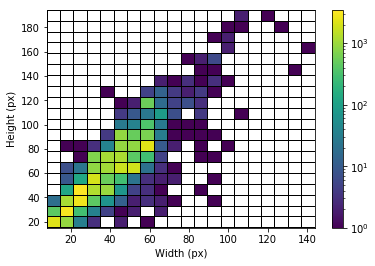

In [80]:
def plot_2d_histogram(x_label, y_label, x_data, y_data):
    plt.hist2d(x_data
               , y_data
               , bins = 20
               , norm = colors.LogNorm()
               , edgecolors = 'k'
               , linewidths = 0.01
              )
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.colorbar()
    plt.show()

    
plot_2d_histogram('Width (px)', 'Height (px)', sample_size_width, sample_size_height)

From the 2D Histogram, we are able to see where most of the data is contained. With this, we can proceed with create some rules to create the training dataset. It is important to note that there is still data to be excluded from the training dataset, which we will remove as soon as we define a new set of rules for it.